## SP23:CS 477/577: Python for Machine Learning

### Homework 1: Python for basic data processing


Student Name: Prestwich, Ross

Department:



This homework aims to help you practice basic Python programing skills using the breast cancer wisconsin dataset. 

![breast image](breastImg.png)

| *Fig. 1. Cell nuclei in a breast histopathology image* | 
|---|
|Fine Needle Aspiration (FNA) biopsy: https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html|
|H&E stain: https://en.wikipedia.org/wiki/H%26E_stain|


Tasks:

[Task 1](#section1)

[Task 2](#section2)

[Task 3](#section3)

[Task 4](#section4)

[Task 5](#section5)

## Dataset

    - Number of data samples: 569
    
    - Each data sample has 30 numeric features/attributes. The first 10 features were directly calculated using mean feautues of all nuclei in an image
    
    - Class labels
        : 212 Malignant (0)
        : 357 Benign (1)
        
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [2]:
import sklearn.datasets as ds
import numpy as np

In [3]:
breast_ds = ds.load_breast_cancer()
print('Data fields in breast_ds: \n', dir(breast_ds))

print('\n Dataset description:\n', breast_ds['DESCR'])

Data fields in breast_ds: 
 ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

 Dataset description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the thre

In [4]:
# we are going to use the first 10 features in this assignment.
ftrs = breast_ds.data[:, :10]
tgts = breast_ds.target

#print(ftrs.shape)

print('Size of feature vectors: ', ftrs.shape)
print('Size of targets: ', tgts.shape)

print('Target labels:\n', tgts)

Size of feature vectors:  (569, 10)
Size of targets:  (569,)
Target labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 

### Task 1: Explore the dataset.  30 points <a id = "section1"/>
    - count the number of data samples for each category (0 or 1 in tgts). 
    - calculate the the mean feature vectors.
    - plot the mean feature vectors.

In [5]:
# count and print out the number of malignant samples (0)
Malignant = (tgts == 0).sum()
print(Malignant)

# count and print out the number of benign samples (1)
Benign = tgts.sum()
print(Benign)

212
357


In [6]:
# calculate the mean of all feature vectors
AverageVector = np.ndarray(ftrs.shape[1])
AverageVector *= 0 #set everything in this vector to 0

#Add all features together to get total
for currentVector in ftrs:
    AverageVector += currentVector

#divide by first memeber of features tupple (to get average)
AverageVector /= ftrs.shape[0]
print("Average Vector: ", AverageVector)

# mean of benign feature vectors
BenignAverage = np.ndarray(ftrs.shape[1])
BenignAverage *= 0 #set everything in this vector to 0

for i in range(tgts.size):
    if(tgts[i] == 1):
        BenignAverage += ftrs[i]
#divide by total Benign
BenignAverage /= Benign
print("Average of Benign Vecotrs: ", BenignAverage)

# mean of malignant feature vectors
MalignantAverage = np.ndarray(ftrs.shape[1])
MalignantAverage *= 0 #set everything in this vector to 0

for i in range(tgts.size):
    if(tgts[i] == 0):
        MalignantAverage += ftrs[i]
#divide by total Benign
MalignantAverage /= Malignant
print("Average of Malignant Vecotrs: ", MalignantAverage)


Average Vector:  [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02]
Average of Benign Vecotrs:  [1.21465238e+01 1.79147619e+01 7.80754062e+01 4.62790196e+02
 9.24776471e-02 8.00846218e-02 4.60576210e-02 2.57174062e-02
 1.74185994e-01 6.28673950e-02]
Average of Malignant Vecotrs:  [1.74628302e+01 2.16049057e+01 1.15365377e+02 9.78376415e+02
 1.02898491e-01 1.45187783e-01 1.60774717e-01 8.79900000e-02
 1.92908962e-01 6.26800943e-02]


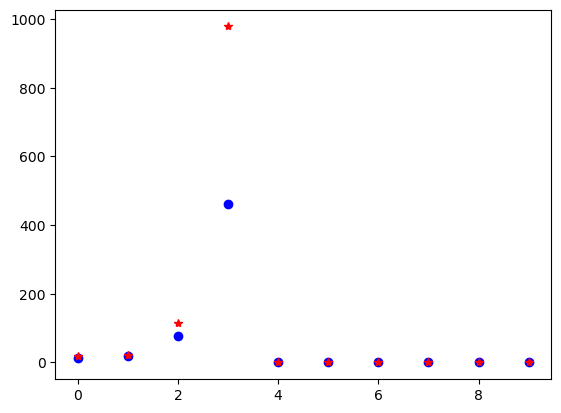

In [7]:
# show the mean feature vectors using matplotlib 
from matplotlib import pyplot as plt
#plt.plot(AverageVector, 'gd')

#show the mean feature vector of benign samples using blue dots
#plt.plot
plt.plot(BenignAverage, 'bo')


#show the mean feature vector of malignant samples using read star
plt.plot(MalignantAverage, 'r*')

### Task 2: Data search. 10 points.  <a id = "section2"/>

Let the user input a sample index (0 to 568), and your code will output the feature vector and the corresponding class label of that sample.

    - Extra 5 points for dealing with abnormal input
    - 5 extra points for enabling multiple searches in one run


In [8]:
# tip: use the input() function
while 1:
    rawInput = input("enter vector index, or type 'exit' ")
    try:
        index = int(rawInput)
        if(index < 0 or index > ftrs.shape[0]):
            print("Index out of range")
        else:
            print(ftrs[index])
    except:
        if(rawInput == "exit"):
            print("Search Over")
            break
        else:
            print("invalid input: ", rawInput)




Search Over


### Task 3.  Study the 'area' feature. 30 points  <a id = "section3"/>
 - Task 3.1: Calculate and print out the mean, min and max values 
 - Task 3.2: Calculate and print out the mean, min and max values 
 - What observations can you get from the results of Tasks 3.1 and 3.2?

Mean 462.79019607843145
Max 1001.0
Min 143.5


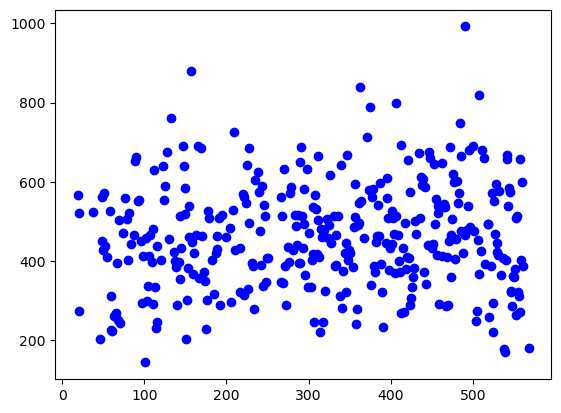

In [9]:
#Task 3.1: Calculate and print out the mean, min and max values 
# of the feature 'area (index 3)' for all benign samples.
BenignAreaMean = 0
BenignAreaMax = ftrs[0][3]
BenignAreaMin = ftrs[0][3]
for i in range(tgts.size):
    if(tgts[i] == 1):
        BenignAreaMean += ftrs[i][3]
        if(ftrs[i][3] > BenignAreaMax):
            BenignAreaMax = ftrs[i][3]
        if(ftrs[i][3] < BenignAreaMin):
            BenignAreaMin = ftrs[i][3]
BenignAreaMean /= Benign
print("Mean", BenignAreaMean)
print("Max", BenignAreaMax)
print("Min", BenignAreaMin)



# plot the area features of all benign samples
for i in range(tgts.size):
    if(tgts[i] == 1):
        #The x is the vector, i didnt think it looked good when they were all on the same point
        plt.plot( i, ftrs[i][3], 'bo')

Mean 978.3764150943397
Max 2501.0
Min 361.6


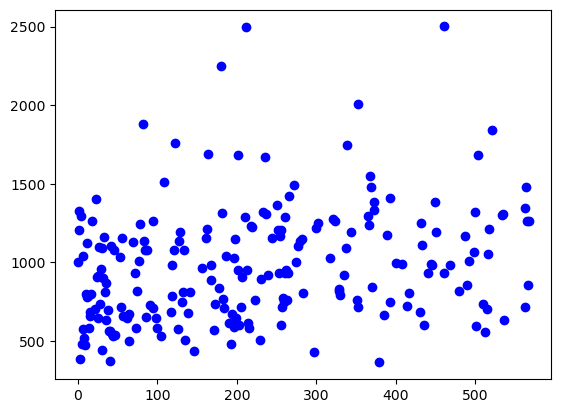

In [10]:
#Task 3.2: Calculate and print out the mean, min and max values 
# of the feature 'area (index 3)' for all malignant samples.
MalAreaMean = 0
MalAreaMax = ftrs[0][3]
MalAreaMin = ftrs[0][3]
for i in range(tgts.size):
    if(tgts[i] == 0):
        MalAreaMean += ftrs[i][3]
        if(ftrs[i][3] > MalAreaMax):
            MalAreaMax = ftrs[i][3]
        if(ftrs[i][3] < MalAreaMin):
            MalAreaMin = ftrs[i][3]
MalAreaMean /= Malignant
print("Mean", MalAreaMean)
print("Max", MalAreaMax)
print("Min", MalAreaMin)



# plot the area features of all benign samples
for i in range(tgts.size):
    if(tgts[i] == 0):
        #The x is the vector, i didnt think it looked good when they were all on the same point
        plt.plot( i, ftrs[i][3], 'bo')

#### Task 3.3: What observations can you get from the results of Tasks 3.1 and 3.2?

Response:

Malignant samples tend to have a higher area than beging samples



### Task 4: Count data samples. 10 points  <a id = "section4"/>



In [11]:
# Task 4.1 Count the number of malignant samples that have 'area (index 3)' values less than 600. 10 points
Mcount = 0
for i in range(tgts.size):
    if(tgts[i] == 0):
        if(ftrs[i][3] < 600):
            Mcount += 1
print("Mal Under 600: ", Mcount)


Mal Under 600:  31


In [12]:
# Task 4.2 Count the number of benign samples that have 'area (index 3)' values less than 600. 10 points
Bcount = 0
for i in range(tgts.size):
    if(tgts[i] == 1):
        if(ftrs[i][3] < 600):
            Bcount += 1
print("B Under 600: ", Bcount)

B Under 600:  304


### Task 5. 20 points <a id = "section5"/>

Define a function that calculates and return the Euclidean distance between any two given data samples
 

In [17]:
# Task 5.1 impliment the Eclidean function
def Eclidean(a, b):
    '''
        inputs:a, b: feature vectors of two patients
        
        return: d: the distance
    '''
    d = np.sqrt(np.sum((a-b)*(a-b)))
    #print(d)
    return d
  
# test
print('two malignant samples:', Eclidean(ftrs[1], ftrs[2])) # two maliganant samples
print('two benign samples:', Eclidean(ftrs[19], ftrs[20])) # two benign samples
print('between two mean vectors:', Eclidean(BenignAverage, MalignantAverage)) # betwwen means

two malignant samples: 123.08662898837753
two benign samples: 46.35812850705252
between two mean vectors: 516.9734937120692


In [18]:
# Task 5.2 calculate and print out the Eclidean distance between each feature vector
# and the mean feature vector of maliganant samples
for i in ftrs:
    print("Between MalMean: ", Eclidean(i, MalignantAverage))
    #print("Between BenignMean: ", Eclidean(i, BenignAverage))


Between MalMean:  26.33286841188874
Between MalMean:  348.100547954307
Between MalMean:  225.11112082189712
Between MalMean:  593.5125407983936
Between MalMean:  319.32932515401563
Between MalMean:  502.40778179535005
Between MalMean:  61.795325836513186
Between MalMean:  401.28462000832985
Between MalMean:  459.4439860471249
Between MalMean:  503.4870301449081
Between MalMean:  181.0332464755555
Between MalMean:  197.76883065979666
Between MalMean:  145.6684522159039
Between MalMean:  196.04450674669724
Between MalMean:  400.6866907488999
Between MalMean:  320.1876522604738
Between MalMean:  294.6161712899466
Between MalMean:  179.73066216538615
Between MalMean:  282.0138745004371
Between MalMean:  413.10237695597965
Between MalMean:  459.3986357986808
Between MalMean:  706.7263815667511
Between MalMean:  274.3848730362856
Between MalMean:  426.2017365311438
Between MalMean:  73.97606494559072
Between MalMean:  65.88638397603917
Between MalMean:  334.0717584016947
Between MalMean:  11